# Homework 4 (HW4)

Deadline: April 28th 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

In [1]:
import warnings
from numpy import RankWarning
warnings.simplefilter('ignore', RankWarning)

## Exercise 1 (HW 4/1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In this exercise we will deal with polynomial regression. The goal will be to analize how the degree of the polynomial affects its performance. (60%)

**a)**  Create (simulate) data from some known probability distribution, i.e. create "artificial" two dimensional data! **Simulate at least 500 datapoints**.
* Use the data-generating function provided below on a chosen interval - feel free to modify the function to get data that suits your taste :)
* Visualize the data on a scatterplot!


(*Hints*: Try changing the degree of the polynomial and increasing the noise (sigma).)

In [3]:
def curve_generator(x, sigma):
    y = np.random.normal((10 - 10*x + x**2), sigma)
    return y

data = [[0, 0] for _ in range(500)]
for i in range(len(data)):
    x = (np.random.rand() * 10)
    y = curve_generator(x, 10)
    data[i] = [x, y]
    
data = np.array(data)

* Randomly select 2/3 of your data as your training set and the remaining as your test set! (Hint: use the *train_test_split* function!)
* Represent the training and test set data in the same figure with different colors. 

In [4]:
# separate feature and target variables
X, y = data[:,0], data[:,1]

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/3), random_state=42)

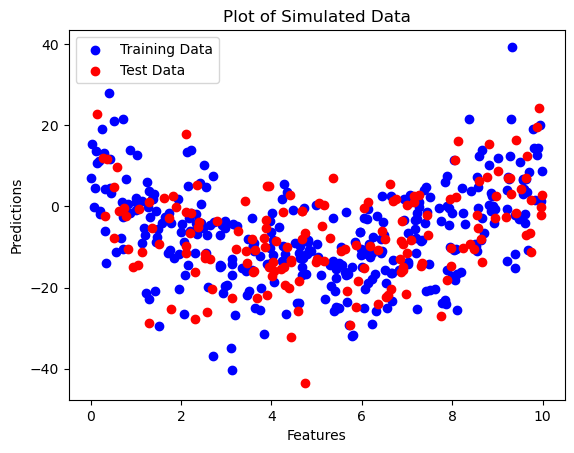

In [5]:
# plot the datasets
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.title("Plot of Simulated Data")
plt.xlabel("Features")
plt.ylabel("Predictions")
plt.legend()
plt.show()

**b)** Apply a simple polynomial regression to the data (target variable: $y$, explanatory variable: $x$). (Hint: use the *np.polyfit* function!) 
* Represent the training and test set error (RMSE-value) with different colors in one figure, as a function of the degree of the polynomial regression (analyze values of the polynomial degree between 0 and 20)!
* <span style="color:red">What can you observe? Interpret the plots!</span>
> <span style="color:blue">Training error is consistently lower than the test error, as we would expect. The error makes a steep decline at around degree 2 for both the training and test data. This is reasonable as our data simulating function is based on a polynomial of degree 2 so we expect that model will fit the data well. There are further small inclines and decliness in both training and test errors. I will attribute these observations to noise because when I rerun the notebook, these types of observations disappear.</span>

In [6]:
# compute RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

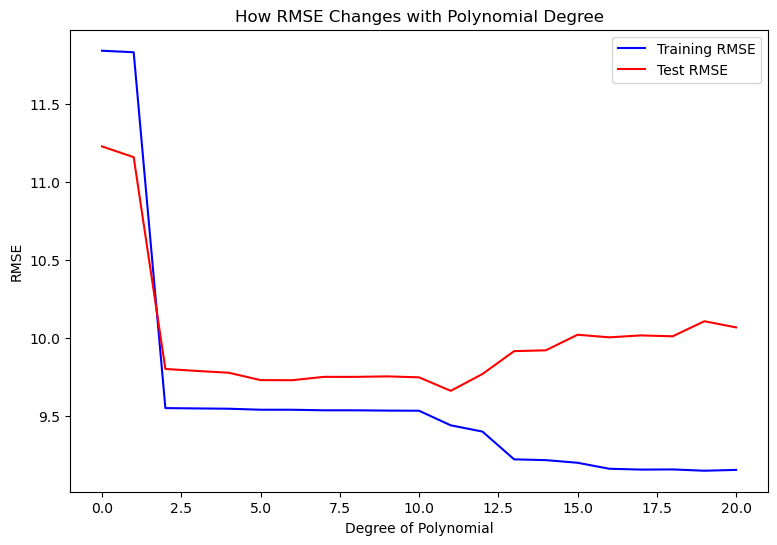

In [7]:
# fit regression model and find errors
train_errors = []
test_errors = []
degrees = range(21)

for degree in degrees:
    coefficients = np.polyfit(X_train, y_train, degree)
    polynomial_function = np.poly1d(coefficients)
    
    y_train_pred = polynomial_function(X_train)
    y_test_pred = polynomial_function(X_test)

    train_rmse = rmse(y_train, y_train_pred)
    test_rmse = rmse(y_test, y_test_pred)
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# plot the model
plt.figure(figsize=(9, 6))
plt.plot(degrees, train_errors, label='Training RMSE', color='blue')
plt.plot(degrees, test_errors, label='Test RMSE', color='red')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('How RMSE Changes with Polynomial Degree')
plt.legend()
plt.show()

**c)** How does the modification of the size of the training set affect the performance of the model? Try at least 4 different training set sizes.
* Carry out the following analysis for each of these polynomial degree values: 1,2,5 and 10. 
* Fix the degree of the polynomial regression and vary the size of the training set (by reducing the size of the original training set). 
    * Plot the training and test set errors (RMSE values) as a function of the size of the training set in the same figure. 
    * <span style="color:red">What can you observe? Interpret the plots!</span>
    > <span style="color:blue">The plots have similar shapes for all the degrees. </span>
    > <span style="color:blue">As the training size increases, the RMSE on both the test and training sets reduce. This change is more poignant with the more complex (larger degrees) models. </span>  
    > As I explained in an email, I was having unreasonable and inconsistent results with this analysis. So I chose to run it on a larger amount of data (5_000 points), and more training set sizes (17 sizes).

In [8]:
 # Generating 5_000 data points (up from 500 earlier)
data = [[0, 0] for _ in range(5_000)]
for i in range(len(data)):
    x = (np.random.rand() * 10)
    y = curve_generator(x, 5)
    data[i] = [x, y]
    
data = np.array(data)

# separate feature and target variables
X, y = data[:,0], data[:,1]

In [9]:
# helper functions
def fitAndError(degree, X_train, y_train, X_test, y_test):
    coefficients = np.polyfit(X_train, y_train, degree)
    polynomial_function = np.poly1d(coefficients)

    y_train_pred = polynomial_function(X_train)
    y_test_pred = polynomial_function(X_test)

    train_rmse = rmse(y_train, y_train_pred)
    test_rmse = rmse(y_test, y_test_pred)
    
    return train_rmse, test_rmse

def resplitData(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    return X_train, X_test, y_train, y_test

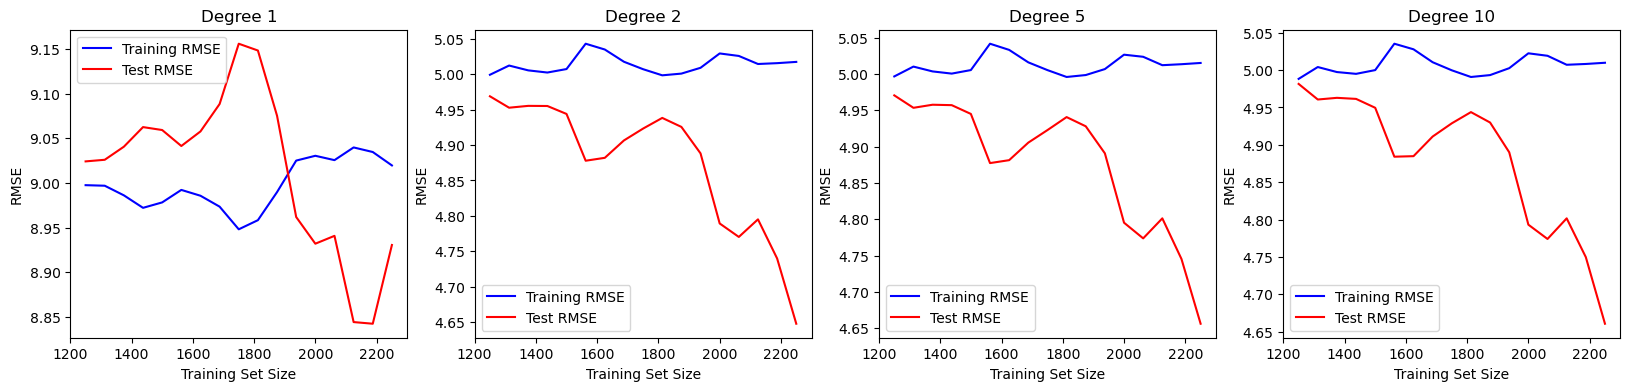

In [10]:
degrees = [1, 2, 5, 10]
test_sizes = [0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5]

# each subplot for a different degree
fig, axs = plt.subplots(nrows=1, ncols=len(degrees), figsize=(20, 4))

# for each degree,
for d, degree in enumerate(degrees):
    train_errors = []
    test_errors = []
    
    # introduce a new train-test split
    for size in test_sizes:
        X_train, X_test, y_train, y_test = resplitData(X, y, size)
        
        # and find the errors for each split
        train_error, test_error = fitAndError(degree, X_train, y_train, X_test, y_test)
        train_errors.append(train_error)
        test_errors.append(test_error)
    
    # for test size 0.1, training size is 0.9 * original training size
    sizes_to_plot = [(1 - size) * len(X_train) for size in test_sizes] 
    
    # plot the errors as a function of the training size for each degree
    axs[d].plot(sizes_to_plot, train_errors, label='Training RMSE', color='blue')
    axs[d].plot(sizes_to_plot, test_errors, label='Test RMSE', color='red')
    axs[d].title.set_text(f"Degree {degree}")
    axs[d].set_xlabel("Training Set Size")
    axs[d].set_ylabel("RMSE")
    axs[d].legend()
   
plt.show()


---

## Exercise 2 (HW4/2)

In [11]:
import tensorflow.keras as keras

from PIL import Image
from PIL import ImageOps
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In this exercise you will have to solve a character recognition problem by training a neural network with Keras. (30%)

**a)** Train a neural network suitable for character recognition on the MNIST data set! Feel free to modify the notebook we used in class. Change a few parameters of the neural network (activation function, dropout rate, number of nodes in a layer, optimizer etc.). <span style="color:red"> Describe which model parameters you changed, and what effect they had on the performance of the model.</span> <br>(Hint: Install Keras with TensorFlow backend through the Anaconda Navigator Environments tab or you can also use Google Colab to solve this problem. You can use a fast GPU on Colab for free!).

  
> I did not use dropout layers because this is a small model that already utilizes early stopping.
My initial model has a best validation accuracy of 0.9772. It uses the z-score normalisation, relu activation, two dense layers, 512 neurons per layer, and the adam optimiser. When I modify thse parameters in the following ways, this is how the best validation accuracy changes:   
> * Min-max -> z-score normalisation: 0.9823
> * Relu -> sigmoid activation: 0.9778
> * Two -> three dense layers: 0.9779
> * 512 -> 100 units per layer: 0.9785
> * adam -> sgd optimizer: 0.9817       
> Evidently, none of the changes had a substantial effect on the model's accuracy. But changing the optimizer from to adam to stochastic gradient descent considerably slowed down convergence, going through several more epochs than it did with adam.   

In [12]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# flatten the images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1] * X_valid.shape[2])

# normalise the data (z-score normalisation)
mean = np.mean(X_train)
std  = np.std(X_train)

X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std

# categorically (one-hot) encode the labels
num_labels = 10
y_train = keras.utils.to_categorical(y_train, num_labels)
y_valid = keras.utils.to_categorical(y_valid, num_labels)

# a multilayer perceptron is sufficient for mnist
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=num_labels, activation='softmax')) # output layer

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

In [13]:
# stop training when validation accuracy stops increasing to prevent overfitting
es = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

# train neural net
net_history = model.fit(
    X_train, y_train, epochs=100000000, verbose=1, validation_data=(X_valid, y_valid), callbacks=[es]
)

Epoch 1/100000000


1875/1875 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.9092 - val_loss: 0.1879 - val_accuracy: 0.9455
Epoch 2/100000000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9554 - val_loss: 0.1354 - val_accuracy: 0.9598
Epoch 3/100000000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1137 - accuracy: 0.9676 - val_loss: 0.1085 - val_accuracy: 0.9675
Epoch 4/100000000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0896 - accuracy: 0.9745 - val_loss: 0.0948 - val_accuracy: 0.9710
Epoch 5/100000000
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0722 - accuracy: 0.9795 - val_loss: 0.0873 - val_accuracy: 0.9720
Epoch 6/100000000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 0.0818 - val_accuracy: 0.9741
Epoch 7/100000000
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0506 - 

**b)** Use the model to try to recognize your own hand-written characters! To do this, scan or take a picture some of your hand-written characters, and apply the model to them. You can find hints on how to do this in the notebook used in class. <span style="color:red">Does the model recognize your handwriting? </span>

In [14]:
# load images from my computer
images = []
images.append(Image.open('digits/zero.jpg')) 
images.append(Image.open('digits/one.jpg')) 
images.append(Image.open('digits/two.jpg')) 
images.append(Image.open('digits/three.jpg'))
images.append(Image.open('digits/four.jpg')) 
images.append(Image.open('digits/five.jpg'))
images.append(Image.open('digits/six.jpg')) 
images.append(Image.open('digits/seven.jpg')) 
images.append(Image.open('digits/eight.jpg')) 
images.append(Image.open('digits/nine.jpg')) 


In [15]:
# compress to size 28*28 and from the 3 channel-rgb to 1-channel greyscale.
for i, image in enumerate(images):
    image = ImageOps.invert(image)
    image = ImageOps.grayscale(image)
    image.thumbnail((28, 28))
    images[i] = image
    
images[0]

In [16]:
# convert to number array, reshape and normalise
images_data = []
for image in images:
    
    image_data = np.asarray(image, dtype = np.uint8)
    image_data = image_data.reshape(-1, X_train.shape[1])
    
    mean = np.mean(image_data)
    std  = np.std(image_data)
    image_data = (image_data - mean) / std
    
    images_data.append(image_data)

print(images_data[0].shape)
images_data[0]

(1, 784)


array([[-0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.51776615, -0.51776615,
        -0.05610075,  0.86723006,  1.37880523,  1.42871501,  1.31641802,
         0.85475261,  0.08115113, -0.51776615, -0.51776615, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.51776615, -0.43042405,  0.9670496 ,  2.42691047,  2.6639819 ,
         2.6639819 ,  2.6639819 ,  2.6639819 ,  2.6639819 ,  2.56416235,
         1.57844433,  0.0437188 , -0.51776615, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.50528871, -0.50528871, -0.50528871,
        -0.50528871, -0.50528871, -0.51776615, -0.21830751,  1.57844433,
         2.6639819 ,  2.41443303,  1.14173381,  0.4

In [17]:
# predict them with our model! moment of truth...
predictions = []
truth       = [i for i in range(10)]

for image in images_data:
    probabilities = model.predict(image)
    predictions.append(np.argmax(probabilities, axis = 1)[0])

print()
print("Predictions :", predictions)
print("Truth values:", truth)

1/1 [==============================] - 0s 17ms/step

Predictions : [3, 2, 2, 3, 7, 3, 2, 7, 8, 4]
Truth values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Not too shabby, I suppose...

---

## Works Cited:

Please cite all external resources you used to complete this assignment. If you used ChatGPT, please include a link to the conversation.

https://chat.openai.com/share/b0bd06f1-4a53-4596-a0db-637c72e854f8       
    